In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# CARGA DE LOS DATASETS A UTILIZAR

Utilizamos dos datasets, uno que es el de pronostico, de como iban a salir los partidos del mundial, y el otro es de los partidos, de como salieron cada uno.\
Ambos archivos se encuentran en la carpeta de assets/archivos

- Pronostico: wc_forecasts.csv
- Partidos: wc_matches.csv

In [2]:
pronostico = pd.read_csv('../assets/archivos/wc_forecasts.csv')
partidos = pd.read_csv('../assets/archivos/wc_matches.csv')

## LIMPIEZA DE LOS DATA SETS

In [3]:
pronostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   forecast_timestamp  256 non-null    object 
 1   team                256 non-null    object 
 2   group               256 non-null    object 
 3   spi                 256 non-null    float64
 4   global_o            256 non-null    float64
 5   global_d            256 non-null    float64
 6   sim_wins            256 non-null    float64
 7   sim_ties            256 non-null    float64
 8   sim_losses          256 non-null    float64
 9   sim_goal_diff       256 non-null    float64
 10  goals_scored        256 non-null    float64
 11  goals_against       256 non-null    float64
 12  group_1             256 non-null    float64
 13  group_2             256 non-null    float64
 14  group_3             256 non-null    float64
 15  group_4             256 non-null    float64
 16  make_rou

El archivo de los pronostico, contiene 256 filas y 22 columnas, que no presentan valores nulos.\
forecast_timestamp, team, group y timestamp son variables cualitativas.

spi, global_o, global_d, goals_scored, goals_against, 
make_round_of_16, make_quarters, make_semis, make_final, win_league son variables Cuantitativas Continuas. 

sim_wins, sim_ties, sim_losses, sim_goal_diff, group_1, group_2, group_3, group_4 son variables Cuantitativas Discretas

In [4]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         64 non-null     object 
 1   league_id    64 non-null     int64  
 2   league       64 non-null     object 
 3   team1        64 non-null     object 
 4   team2        64 non-null     object 
 5   spi1         64 non-null     float64
 6   spi2         64 non-null     float64
 7   prob1        64 non-null     float64
 8   prob2        64 non-null     float64
 9   probtie      64 non-null     float64
 10  proj_score1  64 non-null     float64
 11  proj_score2  64 non-null     float64
 12  score1       64 non-null     int64  
 13  score2       64 non-null     int64  
 14  xg1          64 non-null     float64
 15  xg2          64 non-null     float64
 16  nsxg1        64 non-null     float64
 17  nsxg2        64 non-null     float64
 18  adj_score1   64 non-null     float64
 19  adj_score2

El archivo de los partidos, contiene un total de 64 filas, donde se no contiene ninguno nulo, con 20 columnas

Tambien se puede observar que la columna date, esta como 'object', cuando deberia de ser date o datetime.

### TRADUCCIONES DE LAS COLUMNAS

In [96]:
# Reemplazamos el nombre de las columnas por su traducción a Español para facilitar la lectura
pronostico.rename(columns={
    'forecast_timestamp': 'Fase',
    'team': 'Equipo',
    'group': 'Grupo',
    'spi': 'SPI',
    'global_o': 'Global_Ofensivo',
    'global_d': 'Global_Defensivo',
    'sim_wins': 'Simulaciones_Ganadas',
    'sim_ties': 'Simulaciones_Empatadas',
    'sim_losses': 'Simulaciones_Perdidas',
    'sim_goal_diff': 'Diferencia_Goles_Simulados',
    'goals_scored': 'Goles_Anotados',
    'goals_against': 'Goles_Recibidos',
    'group_1': 'Grupo_1',
    'group_2': 'Grupo_2',
    'group_3': 'Grupo_3',
    'group_4': 'Grupo_4',
    'make_round_of_16': 'Clasificar_a_Octavos',
    'make_quarters': 'Clasificar_a_Cuartos',
    'make_semis': 'Clasificar_a_Semifinales',
    'make_final': 'Clasificar_a_Final',
    'win_league': 'Ganar_Liga',
    'timestamp': 'Fecha'
}, inplace=True)

traducciones = {
    'date': 'fecha',
    'league_id': 'id_liga',
    'league': 'liga',
    'team1': 'equipo1',
    'team2': 'equipo2',
    'spi1': 'spi_equipo1',
    'spi2': 'spi_equipo2',
    'prob1': 'prob_equipo1',
    'prob2': 'prob_equipo2',
    'probtie': 'prob_empate',
    'proj_score1': 'puntaje_proy1',
    'proj_score2': 'puntaje_proy2',
    'score1': 'puntaje1',
    'score2': 'puntaje2',
    'xg1': 'goles_esperados1',
    'xg2': 'goles_esperados2',
    'nsxg1': 'ns_goles_esperados1',
    'nsxg2': 'ns_goles_esperados2',
    'adj_score1': 'puntaje_ajustado1',
    'adj_score2': 'puntaje_ajustado2'
}

partidos.rename(columns=traducciones,inplace= True)
partidos[['puntaje_proy1','puntaje_proy2','goles_esperados1','goles_esperados2']] = partidos[['puntaje_proy1','puntaje_proy2','goles_esperados1','goles_esperados2']].round(1)

### CAMBIO DE LOS VALORES DE LA FASE

In [94]:
# Reemplazamos los valores de forecast_timestamp para que representen las fases de cada partido y no las fechas
pronostico['Fecha'] = pronostico['Fase']
pronostico['Fase'] = pronostico['Fase'].replace({
    '2022-12-18 17:56:03 UTC': 'Post Final',
    '2022-12-17 16:54:45 UTC': 'Pre Final',
    '2022-12-10 21:01:29 UTC': 'Pre Semis',
    '2022-12-06 20:54:12 UTC': 'Pre Cuartos',
    '2022-12-02 21:01:10 UTC': 'Pre Octavos',
    '2022-11-28 20:59:50 UTC': 'Pre 3er partido',
    '2022-11-24 20:56:17 UTC': 'Pre 2do partido',
    '2022-11-16 16:00:55 UTC': 'Pre Inicio Copa',
})

pronostico[pronostico['Equipo'] == 'Argentina'].groupby('Fase').head()

,Fase,Equipo,Grupo,SPI,Global_Ofensivo,Global_Defensivo,Simulaciones_Ganadas,Simulaciones_Empatadas,Simulaciones_Perdidas,Diferencia_Goles_Simulados,...,Grupo_1,Grupo_2,Grupo_3,Grupo_4,Clasificar_a_Octavos,Clasificar_a_Cuartos,Clasificar_a_Semifinales,Clasificar_a_Final,Ganar_Liga,Fecha
0,Post Final,Argentina,C,89.64860,2.83610,0.39397,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,Post Final
32,Pre Final,Argentina,C,88.85631,2.69895,0.37464,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.53027,Pre Final
64,Pre Semis,Argentina,C,87.45777,2.58007,0.39356,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.64042,0.36568,Pre Semis
99,Pre Cuartos,Argentina,C,87.32471,2.57620,0.39880,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.57583,0.24429,0.13042,Pre Cuartos
130,Pre Octavos,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,Pre Octavos
164,Pre 3er partido,Argentina,C,86.02625,2.48839,0.42171,1.57821,0.26472,1.15707,1.89454,...,0.57290,0.20115,0.22498,0.00097,0.77405,0.49381,0.29805,0.12681,0.06528,Pre 3er partido
198,Pre 2do partido,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.23508,0.30558,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,Pre 2do partido
227,Pre Inicio Copa,Argentina,C,87.20776,2.62755,0.43170,1.83671,0.73199,0.43130,3.16936,...,0.59722,0.24273,0.11295,0.04710,0.83995,0.53091,0.32755,0.15944,0.08476,Pre Inicio Copa


### CONVERTIMOS LAS COLUMNAS CORRESPONDIENTES A SU RESPECTIVO VALOR

In [7]:
#Tranformamos la columna Marca_Tiempo, como date
pronostico['Fecha'] = pd.to_datetime(pronostico['Fecha'])
pronostico['Fecha'] = pronostico['Fecha'].dt.date

partidos['fecha'] = pd.to_datetime(partidos['fecha'])

### ELIMINACIÓN DE EQUIPOS QUE PERDIERON EN CADA ETAPA

In [8]:
#Eliminamos los equipos que perdieron antes de los 8vos de final, de los 4tos de final y la Semi Final
pronostico = pronostico.loc[(pronostico['Clasificar_a_Octavos'] != 0) & (pronostico['Clasificar_a_Cuartos'] != 0) & (pronostico['Clasificar_a_Semifinales'] != 0)]
pronostico.head()

,Fase,Equipo,Grupo,SPI,Global_Ofensivo,Global_Defensivo,Simulaciones_Ganadas,Simulaciones_Empatadas,Simulaciones_Perdidas,Diferencia_Goles_Simulados,...,Grupo_1,Grupo_2,Grupo_3,Grupo_4,Clasificar_a_Octavos,Clasificar_a_Cuartos,Clasificar_a_Semifinales,Clasificar_a_Final,Ganar_Liga,Fecha
0,Post Final,Argentina,C,89.64860,2.83610,0.39397,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00000,2022-12-18
1,Post Final,France,D,88.30043,2.96765,0.54381,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00000,2022-12-18
2,Post Final,Morocco,F,73.16416,1.74313,0.53433,2.0,1.0,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-18
3,Post Final,Croatia,F,78.82038,2.20264,0.60290,1.0,2.0,0.0,3.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.00000,2022-12-18
32,Pre Final,Argentina,C,88.85631,2.69895,0.37464,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.53027,2022-12-17


## ANALISIS

In [121]:
def comparacion_resultado(equipo: str,fecha : str,etapa: str,pronostico: pd.DataFrame, partido: pd.DataFrame) -> dict | str:
    """
    Compara el resultado pronosticado de un partido con el resultado real jugado.

    Args:
        equipo (str): Nombre del equipo para el cual se realizará la comparación.
        fecha (str): Fecha de cuando se jugo el partido
        etapa (str): Etapa del torneo o competencia (ej., "fase de grupos", "cuartos de final").
        pronostico (pd.DataFrame): DataFrame que contiene las predicciones para los partidos,
            con columnas relevantes para el pronóstico.
        partido (pd.DataFrame): DataFrame con los resultados reales de los partidos,
            que incluye la información de los equipos y el resultado final.
    Returns:
        dict: Un diccionario que contiene la comparación entre el pronóstico y el resultado real.
    """

    fecha = pd.to_datetime(fecha, yearfirst = True)

    pronostico_equipo = pronostico[(pronostico['Equipo'] == equipo) & (pronostico['Fase'] == etapa)]
    if pronostico_equipo.empty:
        return f"No se encontró pronóstico para el equipo {equipo} en la etapa {etapa}."

    partido_real = partido[
        ((partido['equipo1'] == equipo) | (partido['equipo2'] == equipo)) &
        (partido['fecha'] == fecha)
        ]
    if partido_real.empty:
        return f"No se encontró partido jugado para el equipo {equipo}."

    goles_esperados = (partido_real[['puntaje_proy1', 'puntaje_proy2']].values[0] if partido_real['equipo1'].iloc[0] == equipo 
                    else partido_real[['puntaje_proy2', 'puntaje_proy1']].values[0])

    goles_reales = (partido_real[['puntaje1', 'puntaje2']].values[0] if partido_real['equipo1'].iloc[0] == equipo 
                    else partido_real[['puntaje2', 'puntaje1']].values[0])

    resultado_comparacion = {
        'Equipo': equipo,
        'Etapa': etapa,
        'Goles_Anotados_Pronosticados': round(float(goles_esperados[0]),1),
        'Goles_Recibidos_Pronosticados': round(float(goles_esperados[1]),1),
        'Goles_Anotados_Reales': int(goles_reales[0]),
        'Goles_Recibidos_Reales': int(goles_reales[1])
    }

    return resultado_comparacion

In [131]:
resultados = {}
for fechas in partidos['fecha'].unique():
    for equipos in partidos['equipo1'].unique():
        for etapa in pronostico['Fase'].unique():
            dic = compracion_resultado(equipos,fechas,etapa,pronostico,partidos)
            if type(dic) == dict:
                if equipos not in resultados:
                    resultados[equipos] = [dic]
                else:
                    if dic not in resultados[equipos]:
                        resultados[equipos].append(dic)

In [134]:
resultados['Qatar']

[{'Equipo': 'Qatar',
  'Etapa': 'Pre 2do partido',
  'Goles_Anotados_Pronosticados': 1.1,
  'Goles_Recibidos_Pronosticados': 1.8,
  'Goles_Anotados_Reales': 0,
  'Goles_Recibidos_Reales': 2},
 {'Equipo': 'Qatar',
  'Etapa': 'Pre Inicio Copa',
  'Goles_Anotados_Pronosticados': 1.1,
  'Goles_Recibidos_Pronosticados': 1.8,
  'Goles_Anotados_Reales': 0,
  'Goles_Recibidos_Reales': 2},
 {'Equipo': 'Qatar',
  'Etapa': 'Pre 2do partido',
  'Goles_Anotados_Pronosticados': 1.0,
  'Goles_Recibidos_Pronosticados': 1.7,
  'Goles_Anotados_Reales': 1,
  'Goles_Recibidos_Reales': 3},
 {'Equipo': 'Qatar',
  'Etapa': 'Pre Inicio Copa',
  'Goles_Anotados_Pronosticados': 1.0,
  'Goles_Recibidos_Pronosticados': 1.7,
  'Goles_Anotados_Reales': 1,
  'Goles_Recibidos_Reales': 3},
 {'Equipo': 'Qatar',
  'Etapa': 'Pre 2do partido',
  'Goles_Anotados_Pronosticados': 0.6,
  'Goles_Recibidos_Pronosticados': 2.6,
  'Goles_Anotados_Reales': 0,
  'Goles_Recibidos_Reales': 2},
 {'Equipo': 'Qatar',
  'Etapa': 'Pre Ini

In [124]:
equipo_interes = 'Argentina'
etapa = 'Pre Octavos'
fecha = '2022-12-03'

compracion_resultado(equipo_interes, fecha, etapa, pronostico,partidos)

{'Equipo': 'Argentina',
 'Etapa': 'Pre Octavos',
 'Goles_Anotados_Pronosticados': 1.8,
 'Goles_Recibidos_Pronosticados': 0.6,
 'Goles_Anotados_Reales': 2,
 'Goles_Recibidos_Reales': 1}

## GRAFICOS

### Análisis del SPI (Soccer Power Index) de Argentina. Tomando en cuenta desde previo al inicio del torneo hasta después del encuentro final.

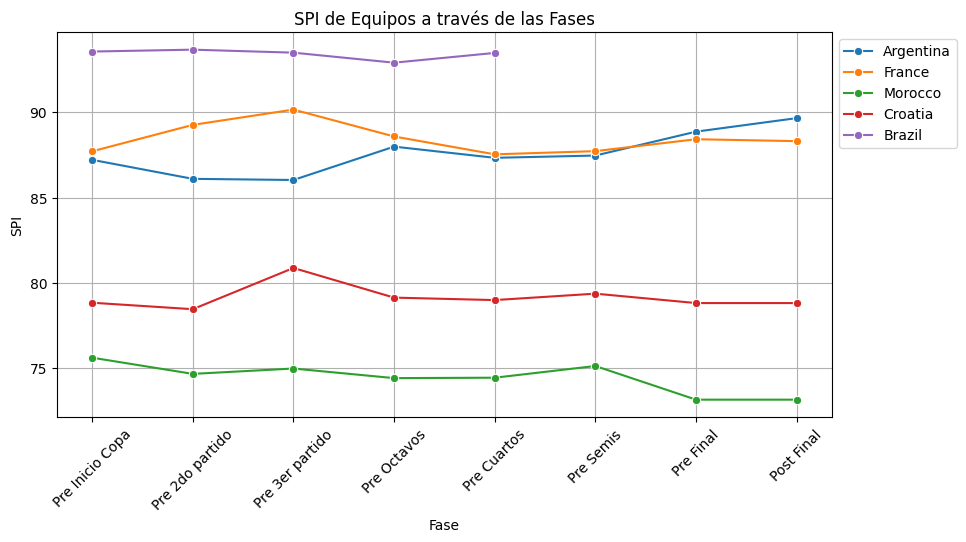

In [ ]:
equipos_interes = ['Argentina', 'France', 'Brazil', 'Croatia', 'Morocco']
equipos_data = pronostico[pronostico['Equipo'].isin(equipos_interes)]

plt.figure(figsize=(10, 5))
sns.lineplot(data=equipos_data, x='Fase', y='SPI', hue='Equipo', marker='o', sort=False)

# Invertir el orden del eje x
plt.gca().invert_xaxis()

plt.title('SPI de Equipos a través de las Fases')
plt.xlabel('Fase')
plt.ylabel('SPI')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)

plt.show()